## Matrice de termes

On voit dans ce notebook comment créer une matrice de termes à partir de notre corpus de termes, de manière à pouvoir faire tourner les modèles que l'on connaît par ailleurs sur des variables numériques.  

On charge les données nettoyées.

In [2]:
import pickle


import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


cr_df_clean = pd.read_pickle('cr_df_clean.pkl')
cr_df_clean.texte.values[0]

'pas besoin de se pincer pour y croire l équipe de france a bien écrit ce dimanche une nouvelle page de son histoire en dominant la croatie  au terme d une finale qui a tourné à son avantage en début de seconde période les bleus ont réussi là où tous les autres favoris avaient échoué en russie ce sacre est celui de la maîtrise  même si elle en a parfois manqué contre un adversaire qui lui a posé plus de problèmes qu on l aurait pensé c est aussi celui de didier deschamps son sélectionneur porte bonheur le troisième seulement à soulever la coupe en tant que joueur et entraîneur après le brésilien zagallo et l allemand beckenbauer il y avait les précurseurs expérimentés en  vingt ans après ce sont des gamins qui ont réussi l impensable l avenir leur appartient le film du matchalors qu on aurait cru les français décidés à aller au carton d entrée pour faire douter des croates censés être plus fatigués par leur débauche d énergie des tours précédents  trois prolongations en es quarts et de

On va créer la matrice de termes, en indiquant au logiciel d'enlever les mots-balise comme "le", "et",... Ces mots n'apportent en effet pas grand chose à l'analyse en général. problème : la fonction propose automatiquement d'enlever les mots balise anglais mais pas les français. On va donc récupérer une liste dans un module python : 

In [3]:
from stop_words import get_stop_words
french_stop_words = get_stop_words('french')
french_stop_words

['a',
 'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'alors',
 'as',
 'au',
 'aucun',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aussi',
 'autre',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avoir',
 'avons',
 'ayant',
 'ayez',
 'ayons',
 'bon',
 'car',
 'ce',
 'ceci',
 'cela',
 'ces',
 'cet',
 'cette',
 'ceux',
 'chaque',
 'ci',
 'comme',
 'comment',
 'd',
 'dans',
 'de',
 'dedans',
 'dehors',
 'depuis',
 'des',
 'deux',
 'devoir',
 'devrait',
 'devrez',
 'devriez',
 'devrions',
 'devrons',
 'devront',
 'dois',
 'doit',
 'donc',
 'dos',
 'droite',
 'du',
 'dès',
 'début',
 'dù',
 'elle',
 'elles',
 'en',
 'encore',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'faire',
 'fais',
 'faisez',
 'fait',
 'faites',
 'fois',
 'font',
 'force',
 'furent',

On peut maintenant utiliser `CountVectorizer` pour faire notre matrice de termes avec nos mots balise français : 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = french_stop_words)

# On fit_transform 
cr_cv = cv.fit_transform(cr_df_clean.texte)
cr_dtm = pd.DataFrame(cr_cv.toarray(), columns = cv.get_feature_names())
cr_dtm.index = cr_df_clean.index
cr_dtm

,abattait,accentué,acclamé,accordé,acte,adversaire,alex,allemand,aller,américain,...,voir,wiegman,zagallo,échoué,écrit,égalisé,énergie,équipe,états,éternité
CR hommes,1,1,0,1,1,2,0,1,1,0,...,0,0,1,1,1,1,1,3,0,1
CR femmes,0,0,1,1,0,0,4,0,0,1,...,1,1,0,0,0,0,0,0,1,0


On peut maintenant regarder quels sont les mots les plus utilisés pour chacun des compte-rendus : c'est aussi l'occasion de vérifier que notre nettoyage a bien été réalisé ou s'il nécessite quelques retouches.

In [5]:
# on transpose le df pour trier par mots les plus utilisés
dtm_analyse = cr_dtm.transpose()
dtm_analyse.head(20)

,CR hommes,CR femmes
abattait,1,0
accentué,1,0
acclamé,0,1
accordé,1,1
acte,1,0
adversaire,2,0
alex,0,4
allemand,1,0
aller,1,0
américain,0,1


In [11]:
# pour les femmes
dtm_analyse["CR femmes"].sort_values(ascending = False).head(20)

morgan         6
van            6
rapinoe        4
américaines    4
alex           4
gardienne      3
coup           3
match          3
but            3
gauche         3
pu             3
veenendaal     3
frappart       3
centres        3
stéphanie      3
penalty        3
compétition    3
face           3
plus           3
megan          3
Name: CR femmes, dtype: int64

Avec la librairie `wordcloud`, on peut faire une représentation graphique intéressante de ces résultats : 

__Exercice :__  
- Utilisez la fonction `WordCloud` pour faire un nuage de mots pour le compte-rendu de match femmes et un autre pour celui des hommes. Voyez-vous d'autres nettoyages de mots à faire?
- 
- 
- 
- 
- 
- 
- 
- 
-   
__On corrige ensemble :__

In [12]:
# Start with one review:
text = cr_df_clean.texte.values[0]
text

'pas besoin de se pincer pour y croire l équipe de france a bien écrit ce dimanche une nouvelle page de son histoire en dominant la croatie  au terme d une finale qui a tourné à son avantage en début de seconde période les bleus ont réussi là où tous les autres favoris avaient échoué en russie ce sacre est celui de la maîtrise  même si elle en a parfois manqué contre un adversaire qui lui a posé plus de problèmes qu on l aurait pensé c est aussi celui de didier deschamps son sélectionneur porte bonheur le troisième seulement à soulever la coupe en tant que joueur et entraîneur après le brésilien zagallo et l allemand beckenbauer il y avait les précurseurs expérimentés en  vingt ans après ce sont des gamins qui ont réussi l impensable l avenir leur appartient le film du matchalors qu on aurait cru les français décidés à aller au carton d entrée pour faire douter des croates censés être plus fatigués par leur débauche d énergie des tours précédents  trois prolongations en es quarts et de

In [13]:
stopwordsh = french_stop_words
stopwordsh.append("après")

In [14]:
stopwordsf = french_stop_words
stopwordsf.append("après")

In [15]:
# Create and generate a word cloud image:
wordcloudH = WordCloud(stopwords=stopwordsh).generate(cr_df_clean.texte.values[0])

In [16]:
# Create and generate a word cloud image:
wordcloudF = WordCloud(stopwords=stopwordsh).generate(cr_df_clean.texte.values[1])

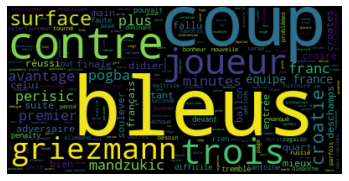

In [17]:
# Display the generated image:
plt.imshow(wordcloudH, interpolation='bilinear')
plt.axis("off")
plt.show()

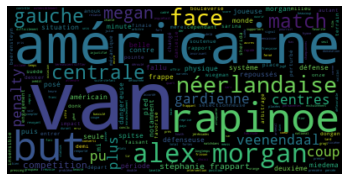

In [18]:
# Display the generated image:
plt.imshow(wordcloudF, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
eskifaia = """Jahknow, Kofa , Bym Love Corner Sound créé en 1999 par Kofa et Bym \n
inscrit dès le départ comme un sound system très actif dans la région Toulousaine. \n
Avec plusieurs soirées par mois et une émission de Radio sur Canal Sud équipe est \n
vite agrandie et son rayon d'action aussi. Officiant de Toulouse à Montpellier puis \n
à Marseille est dans tout le sud est que Love Corner à développé son audience. \n
Daddy Mory, Sister Carol, U Brown, Earl Sixteen, Ranking Joe, Brahim... et tant \n
autres que équipe a mis à l'affiche. De 2002 à 2003 Love Corner à aussi participé \n
à quelques sound clash. Une finale qui reste dans les mémoires: Love Corner contre \n
Daddy Nono de Blues Party. était un honneur de perdre contre toi Nono, R.I.P.\n
est suivi  pause des organisations en France pour exporter en République Tchèque et \n
en Slovaquie où Love Corner à pu programmer General Levy, Big Famili ou Skandalyze. \n
De retour en France, est à Bayonne que Love Corner à installé ses quartiers et fait \n
partie intégrante de association Eskifaia depuis leur première programmation avec \n
General Levy au BiBam.  Love Corner strictly vynils."""

In [20]:
ma_chaine = """Et comme je disais, les expressions régulières sont à la fois passionantes et trop peu utilisées; 
saviez-vous que 93% de la population française ignorait son existence?"""
ma_chaine

'Et comme je disais, les expressions régulières sont à la fois passionantes et trop peu utilisées; \nsaviez-vous que 93% de la population française ignorait son existence?'

In [21]:
stopwordsESKI = french_stop_words
stopwordsESKI.append("celui")

In [22]:
# Create and generate a word cloud image:
wordcloudESKI = WordCloud(stopwords=stopwordsESKI).generate(eskifaia )

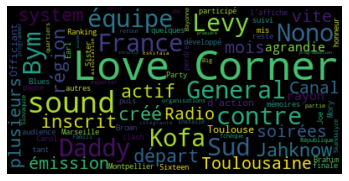

In [103]:
# Display the generated image:
plt.imshow(wordcloudESKI, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

In [24]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [25]:
# load wikipedia text on rainbow
text = open(os.path.join(d, 'eskifaia.txt')).read()

In [26]:
# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "eskifaia.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

In [27]:
# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

In [28]:
# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

In [29]:
# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)


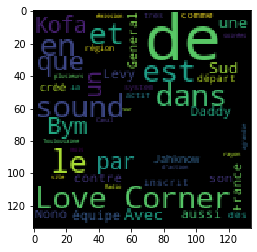

In [30]:
# generate word cloud
wc.generate(text)
plt.imshow(wc)

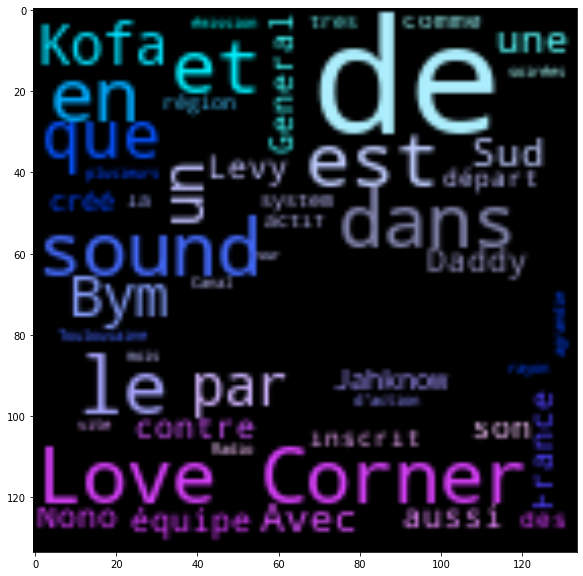

In [31]:
# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

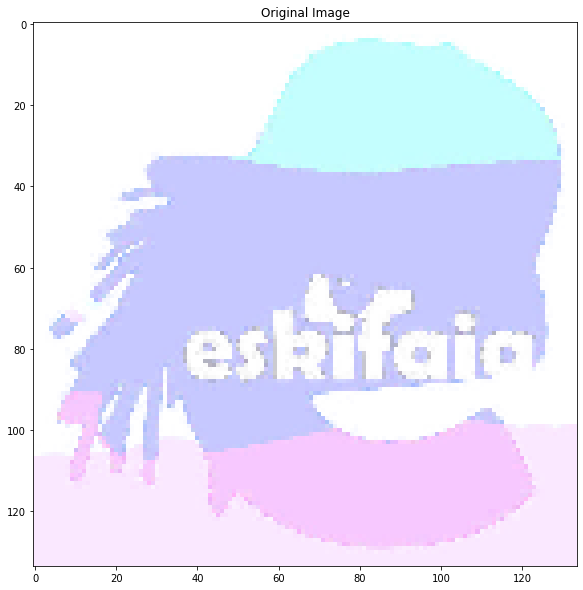

In [32]:
plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

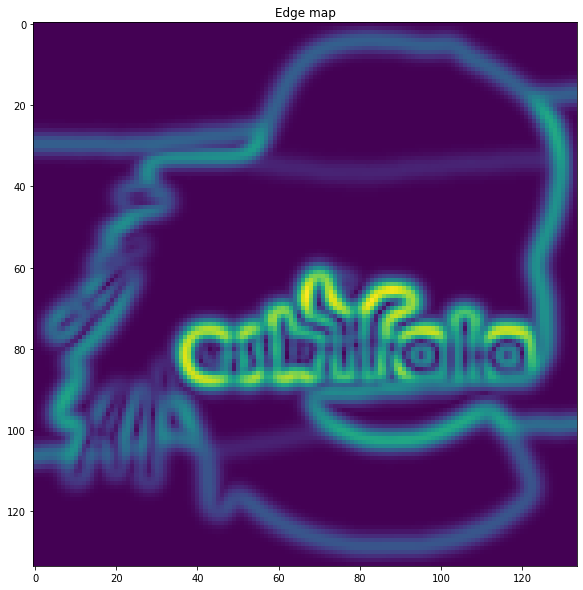

In [33]:
plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()